<a href="https://colab.research.google.com/github/firdaaacy/Intro-Machine-Learning/blob/main/DATA%20QUALITY%20FOR%20BEGINNER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA PROFILING**

Exploratory Data Analysis (EDA) adalah menggunakan pendekatan statistik yang bertujuan untuk menemukan dan meringkas sebuah dataset, mengetahui struktur dan hubungan antar variabel dalam dataset. EDA merupakan proses pre-analysis baik untuk descriptive analysis maupun predictive analysis.Salah satu aspek EDA, yaitu: Data Profiling!

Data profiling adalah kegiatan merangkum dataset menggunakan statistik deskriptif. Tujuan dari pembuatan data profiling adalah untuk memiliki pemahaman yang kuat tentang data sehingga dapat mulai menyusun framework analisis  dan memvisualisasikan data.

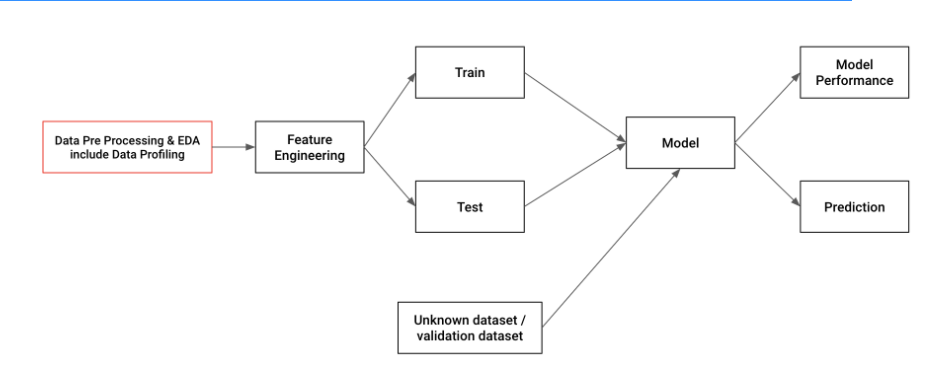

In [1]:
!pip install pandas-profiling==2.7.1 

In [2]:
import pandas as pd
import numpy as np
import io
import pandas_profiling

retail_raw  = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')
print(retail_raw )

      order_id  order_date  customer_id  ...    brand quantity item_price
0      1703458  17/10/2019        14004  ...  BRAND_J     10.0   740000.0
1      1706815  24/10/2019        17220  ...  BRAND_R      2.0   604000.0
2      1710718  03/11/2019        16518  ...  BRAND_C      8.0  1045000.0
3      1683592  19/08/2019        16364  ...  BRAND_A      4.0   205000.0
4      1702573  16/10/2019        15696  ...  BRAND_R      2.0        NaN
...        ...         ...          ...  ...      ...      ...        ...
4995   1724011  01/12/2019        12838  ...  BRAND_R      2.0   450000.0
4996   1676302  28/07/2019        13833  ...  BRAND_C      3.0  1465000.0
4997   1706071  23/10/2019        16332  ...  BRAND_H      4.0   747000.0
4998   1703620  17/10/2019        13055  ...  BRAND_C      8.0   695000.0
4999   1720036  24/11/2019        17609  ...  BRAND_S      1.0  1045000.0

[5000 rows x 9 columns]


In [3]:
# Cetak tipe data di setiap kolom retail_raw
print(retail_raw.dtypes)

order_id         int64
order_date      object
customer_id      int64
city            object
province        object
product_id      object
brand           object
quantity       float64
item_price     float64
dtype: object


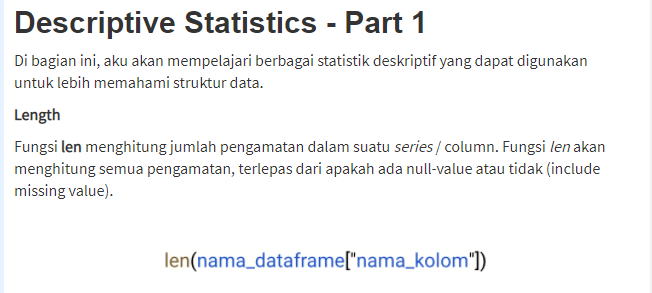

In [4]:
length_city = len(retail_raw['city'])
print('Length kolom city:', length_city)

# Tugas Praktek: Kolom product_id
length_product_id = len(retail_raw['product_id'])
print('Length kolom product_id:', length_product_id)

Length kolom city: 5000
Length kolom product_id: 5000


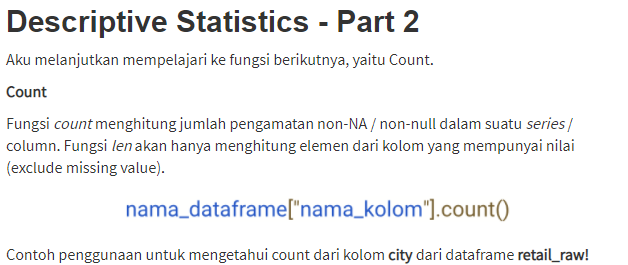

In [5]:
# Count kolom city
count_city = retail_raw['city'].count()
print('Count kolom count_city:', count_city)

# Tugas praktek: count kolom product_id
count_product_id = retail_raw['product_id'].count()
print('Count kolom product_id:', count_product_id)

Count kolom count_city: 4984
Count kolom product_id: 4989


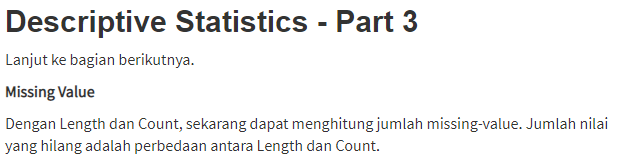

In [6]:
# Missing value pada kolom city
number_of_missing_values_city = length_city - count_city
float_of_missing_values_city = float(number_of_missing_values_city/length_city)
pct_of_missing_values_city = '{0:.1f}%'.format(float_of_missing_values_city * 100)
print('Persentase missing value kolom city:', pct_of_missing_values_city)

# Tugas praktek: Missing value pada kolom product_id
number_of_missing_values_product_id = length_product_id - count_product_id
float_of_missing_values_product_id = float(number_of_missing_values_product_id/length_product_id )
pct_of_missing_values_product_id = '{0:.1f}%'.format(float_of_missing_values_product_id* 100)
print('Persentase missing value kolom product_id:', pct_of_missing_values_product_id)

Persentase missing value kolom city: 0.3%
Persentase missing value kolom product_id: 0.2%


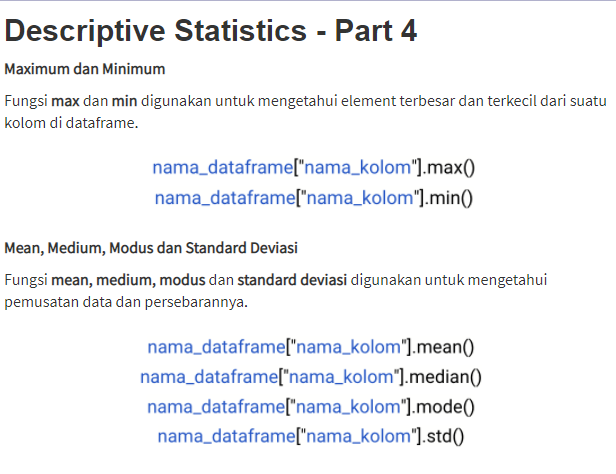

In [7]:
# Deskriptif statistics kolom quantity
print('Kolom quantity')
print('Minimum value: ', retail_raw['quantity'].min())
print('Maximum value: ', retail_raw['quantity'].max())
print('Mean value: ', retail_raw['quantity'].mean())
print('Mode value: ', retail_raw['quantity'].mode())
print('Median value: ', retail_raw['quantity'].median())
print('Standard Deviation value: ', retail_raw['quantity'].std())

# Tugas praktek: Deskriptif statistics kolom item_price
print('')
print('Kolom item_price')
print('Minimum value: ', retail_raw['item_price'].min())
print('Maximum value: ', retail_raw['item_price'].max())
print('Mean value: ', retail_raw['item_price'].mean())
# print('Mode value: ', retail_raw['item_price'].mode())
print('Median value: ', retail_raw['item_price'].median())
print('Standard Deviation value: ', retail_raw['item_price'].std())

Kolom quantity
Minimum value:  1.0
Maximum value:  720.0
Mean value:  11.423987164059366
Mode value:  0    1.0
dtype: float64
Median value:  5.0
Standard Deviation value:  29.442025010811317

Kolom item_price
Minimum value:  26000.0
Maximum value:  29762000.0
Mean value:  933742.7311008623
Median value:  604000.0
Standard Deviation value:  1030829.8104242863


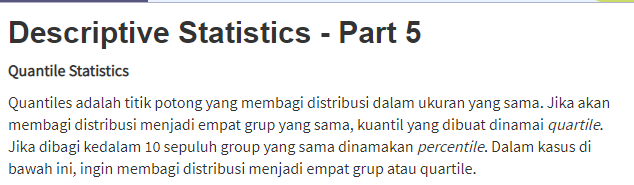

In [8]:
# Quantile statistics kolom quantity
print('Kolom quantity:')
print(retail_raw['quantity'].quantile([0.25, 0.5, 0.75]))

# Tugas praktek: Quantile statistics kolom item_price
print('')
print('Kolom item_price:')
print(retail_raw['item_price'].quantile([0.25, 0.5, 0.75]))

Kolom quantity:
0.25     2.0
0.50     5.0
0.75    12.0
Name: quantity, dtype: float64

Kolom item_price:
0.25     450000.0
0.50     604000.0
0.75    1045000.0
Name: item_price, dtype: float64


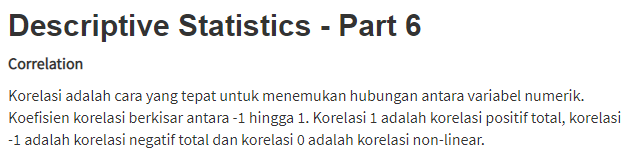

In [9]:
print('Korelasi quantity dengan item_price')
print(retail_raw[['quantity', 'item_price']].corr())

Korelasi quantity dengan item_price
            quantity  item_price
quantity    1.000000   -0.133936
item_price -0.133936    1.000000


In [11]:
pandas_profiling.ProfileReport(retail_raw)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **DATA CLEANSING**

Data Cleansing berarti proses mengidentifikasi bagian data yang salah, tidak lengkap, tidak akurat, tidak relevan atau hilang dan kemudian memodifikasi, mengganti atau menghapusnya sesuai dengan kebutuhan. Data Cleansing dianggap sebagai elemen dasar dari Data Science

 

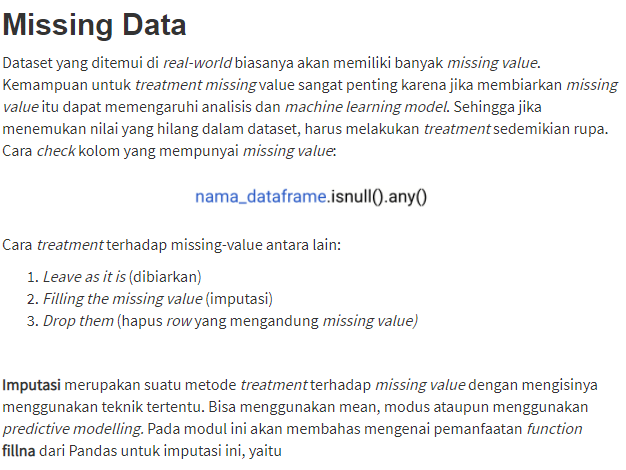

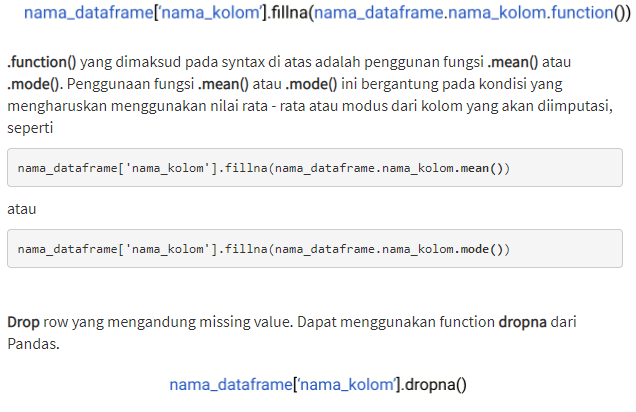

In [12]:
# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(retail_raw.isnull().any())

# Filling the missing value (imputasi)
print('\nFilling the missing value (imputasi):')
print(retail_raw['quantity'].fillna(retail_raw.quantity.mean()))

# Drop missing value
print('\nDrop missing value:')
print(retail_raw['quantity'].dropna())

Check kolom yang memiliki missing data:
order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool

Filling the missing value (imputasi):
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 5000, dtype: float64

Drop missing value:
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 4986, dtype: float64


In [13]:
print(retail_raw['item_price'].fillna(retail_raw['item_price'].mean()))

0       7.400000e+05
1       6.040000e+05
2       1.045000e+06
3       2.050000e+05
4       9.337427e+05
            ...     
4995    4.500000e+05
4996    1.465000e+06
4997    7.470000e+05
4998    6.950000e+05
4999    1.045000e+06
Name: item_price, Length: 5000, dtype: float64


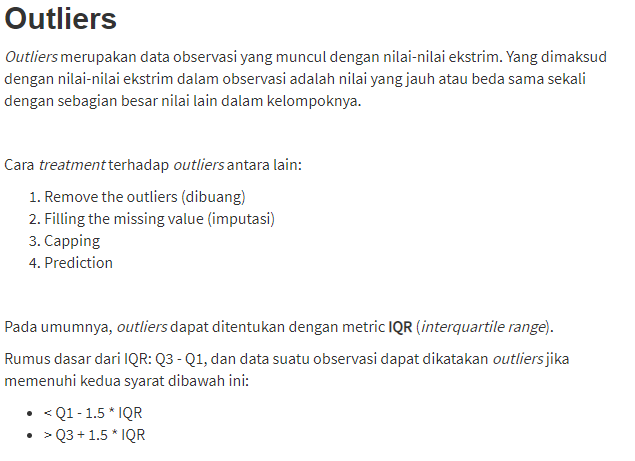

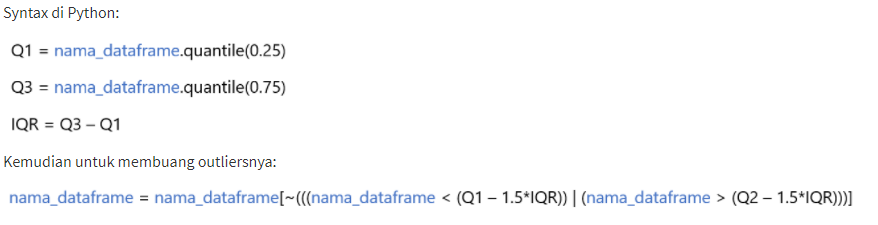